# Data Presention and Visualization

In [2]:
"""BreastCancerAI (c) by Roi Dvir
BreastCancerAI is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License.
You should have received a copy of the license along with this work. If not, see <http://creativecommons.org/licenses/by-nc-nd/4.0/>."""


# import libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
dataset = pd.read_csv('./data/Breast_Cancer_Data_CSV.csv')
dataset.drop(['ID number'],axis=1,inplace=True)
dataset.head()
print("Cancer data set dimensions : {}".format(dataset.shape))
dataset.head()

Cancer data set dimensions : (569, 31)


,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
dataset.isnull().sum()

radius.mean              0
texture.mean             0
perimeter.mean           0
area.mean                0
smoothness.mean          0
compactness.mean         0
concavity.mean           0
concave points.mean      0
symmetry.mean            0
fractal dimension        0
radius.std               0
texture.std              0
perimeter.std            0
area.std                 0
smoothness.std           0
compactness.std          0
concavity.std            0
concave points.std       0
symmetry.std             0
fractal dimension.std    0
radius.w                 0
texture.w                0
perimeter.w              0
area.w                   0
smoothness.w             0
compactness.w            0
concavity.w              0
concave points.w         0
symmetry.w               0
fractal dimension.w      0
Diagnosis                0
dtype: int64

In [5]:
dataset.describe()

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,radius.w,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
dataset['Diagnosis'] = dataset['Diagnosis'].map({'M':1,'B':0})

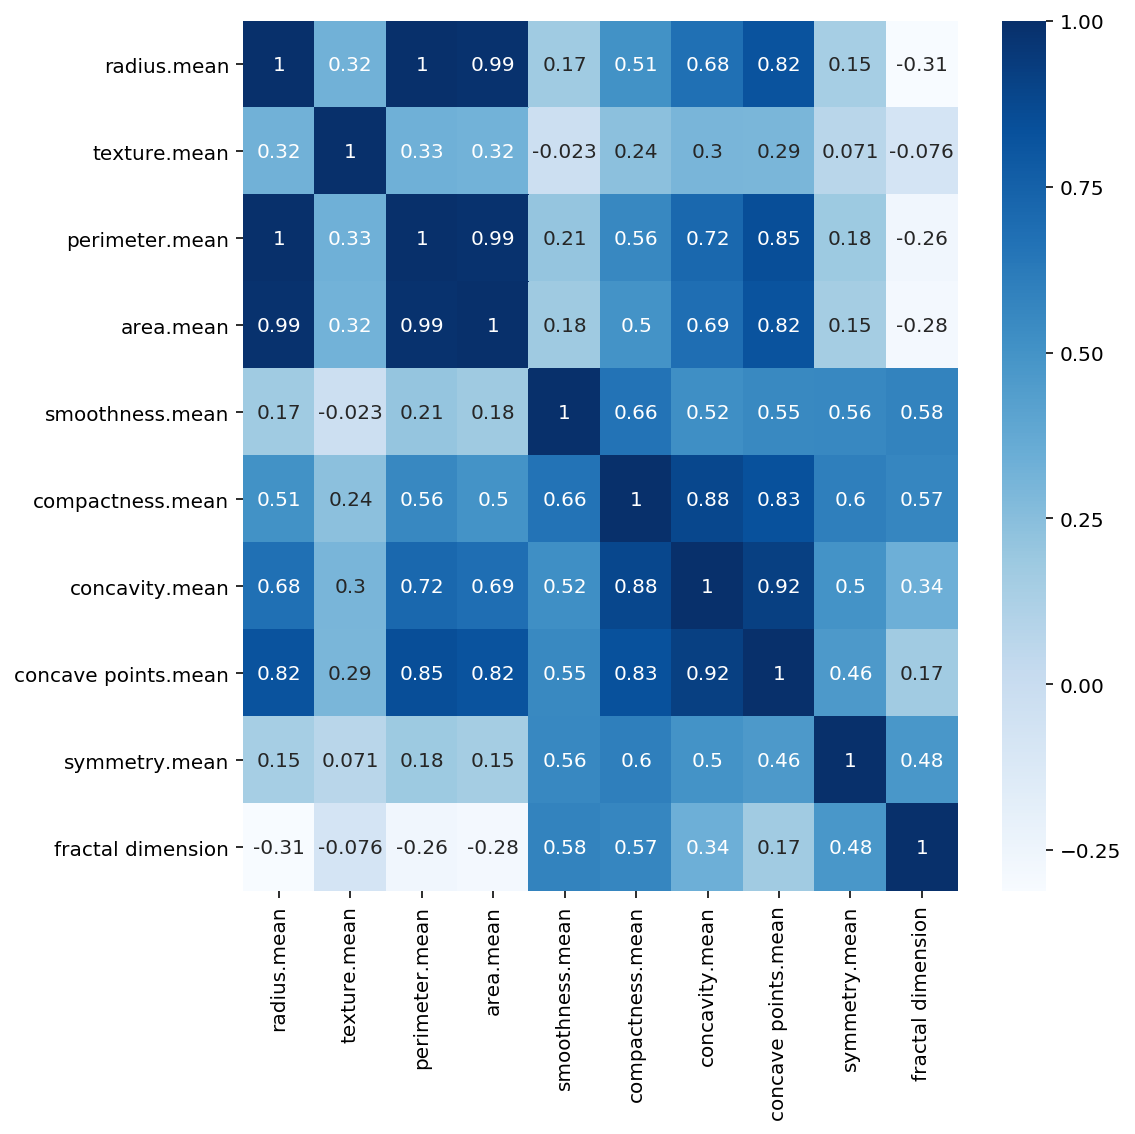

In [7]:
df_corr_mean = dataset.iloc[:, 0:10].corr()
plt.figure(figsize=(8,8))
sn.heatmap(df_corr_mean, cmap="Blues", annot=True)
plt.show()

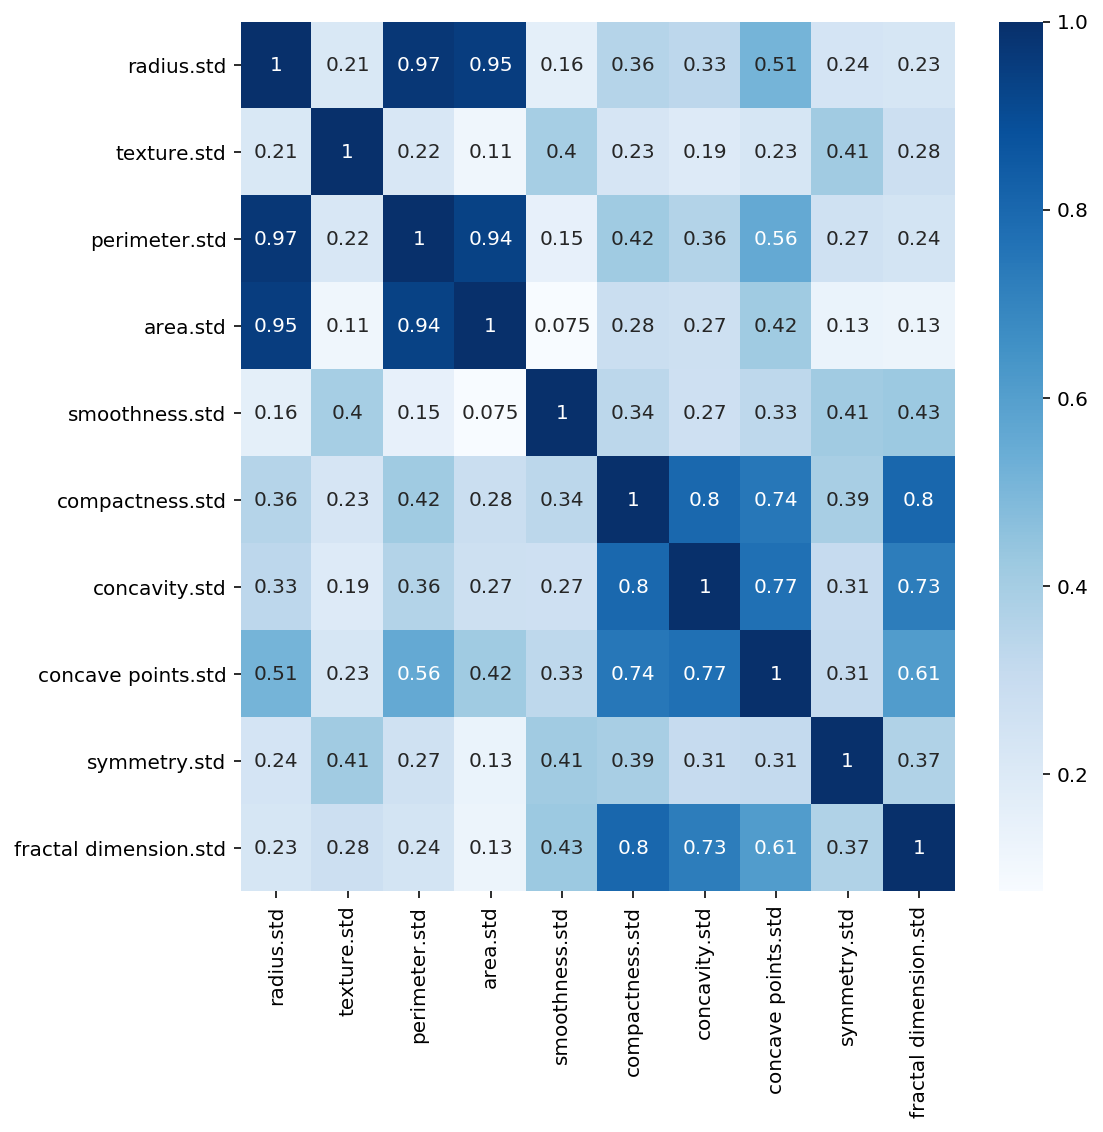

In [8]:
df_corr_std = dataset.iloc[:, 10:20].corr()
plt.figure(figsize=(8,8))
sn.heatmap(df_corr_std, cmap="Blues", annot=True)
plt.show()

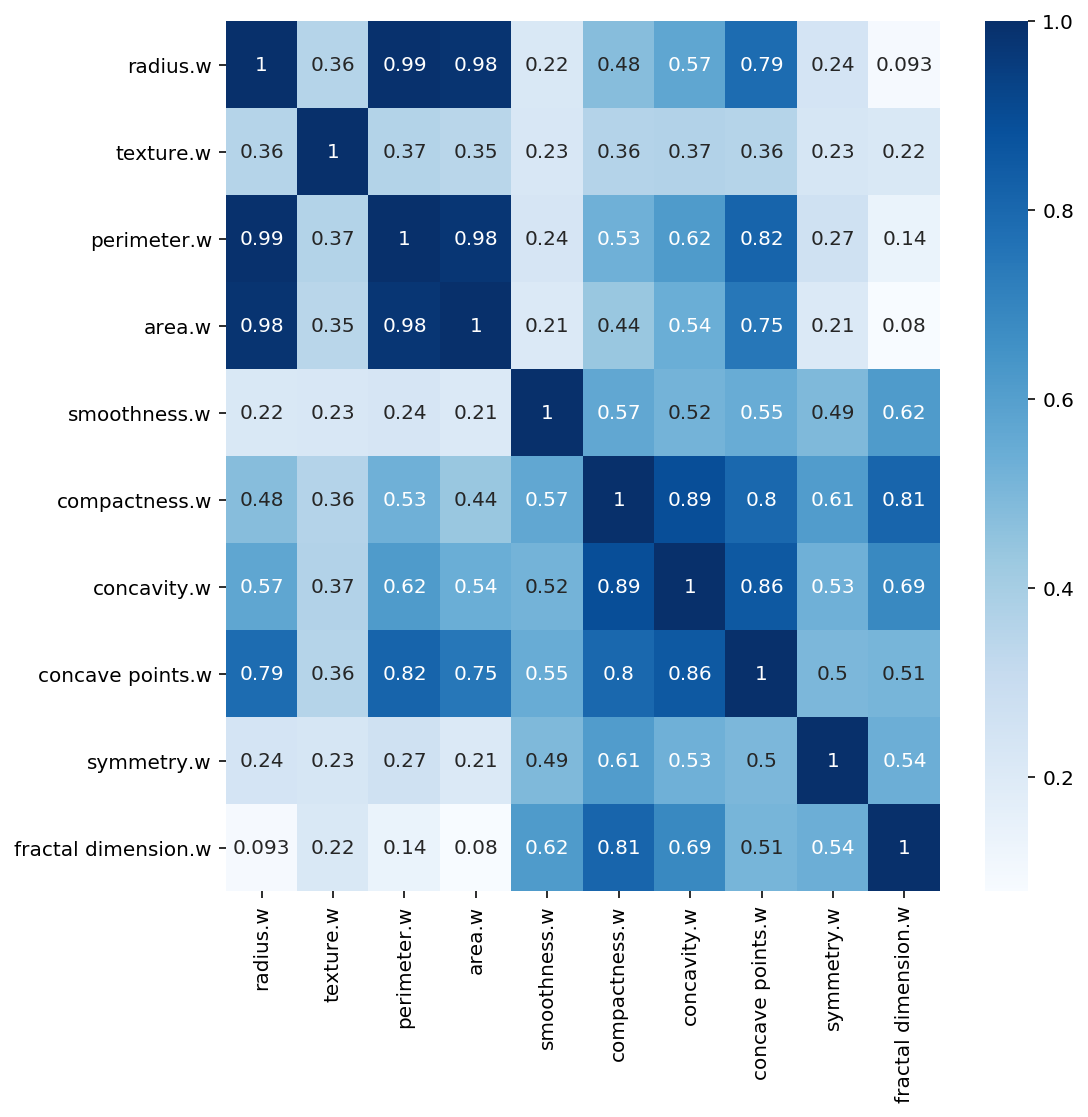

In [9]:
df_corr_worse = dataset.iloc[:, 20:30].corr()
plt.figure(figsize=(8,8))
sn.heatmap(df_corr_worse, cmap="Blues", annot=True)
plt.show()

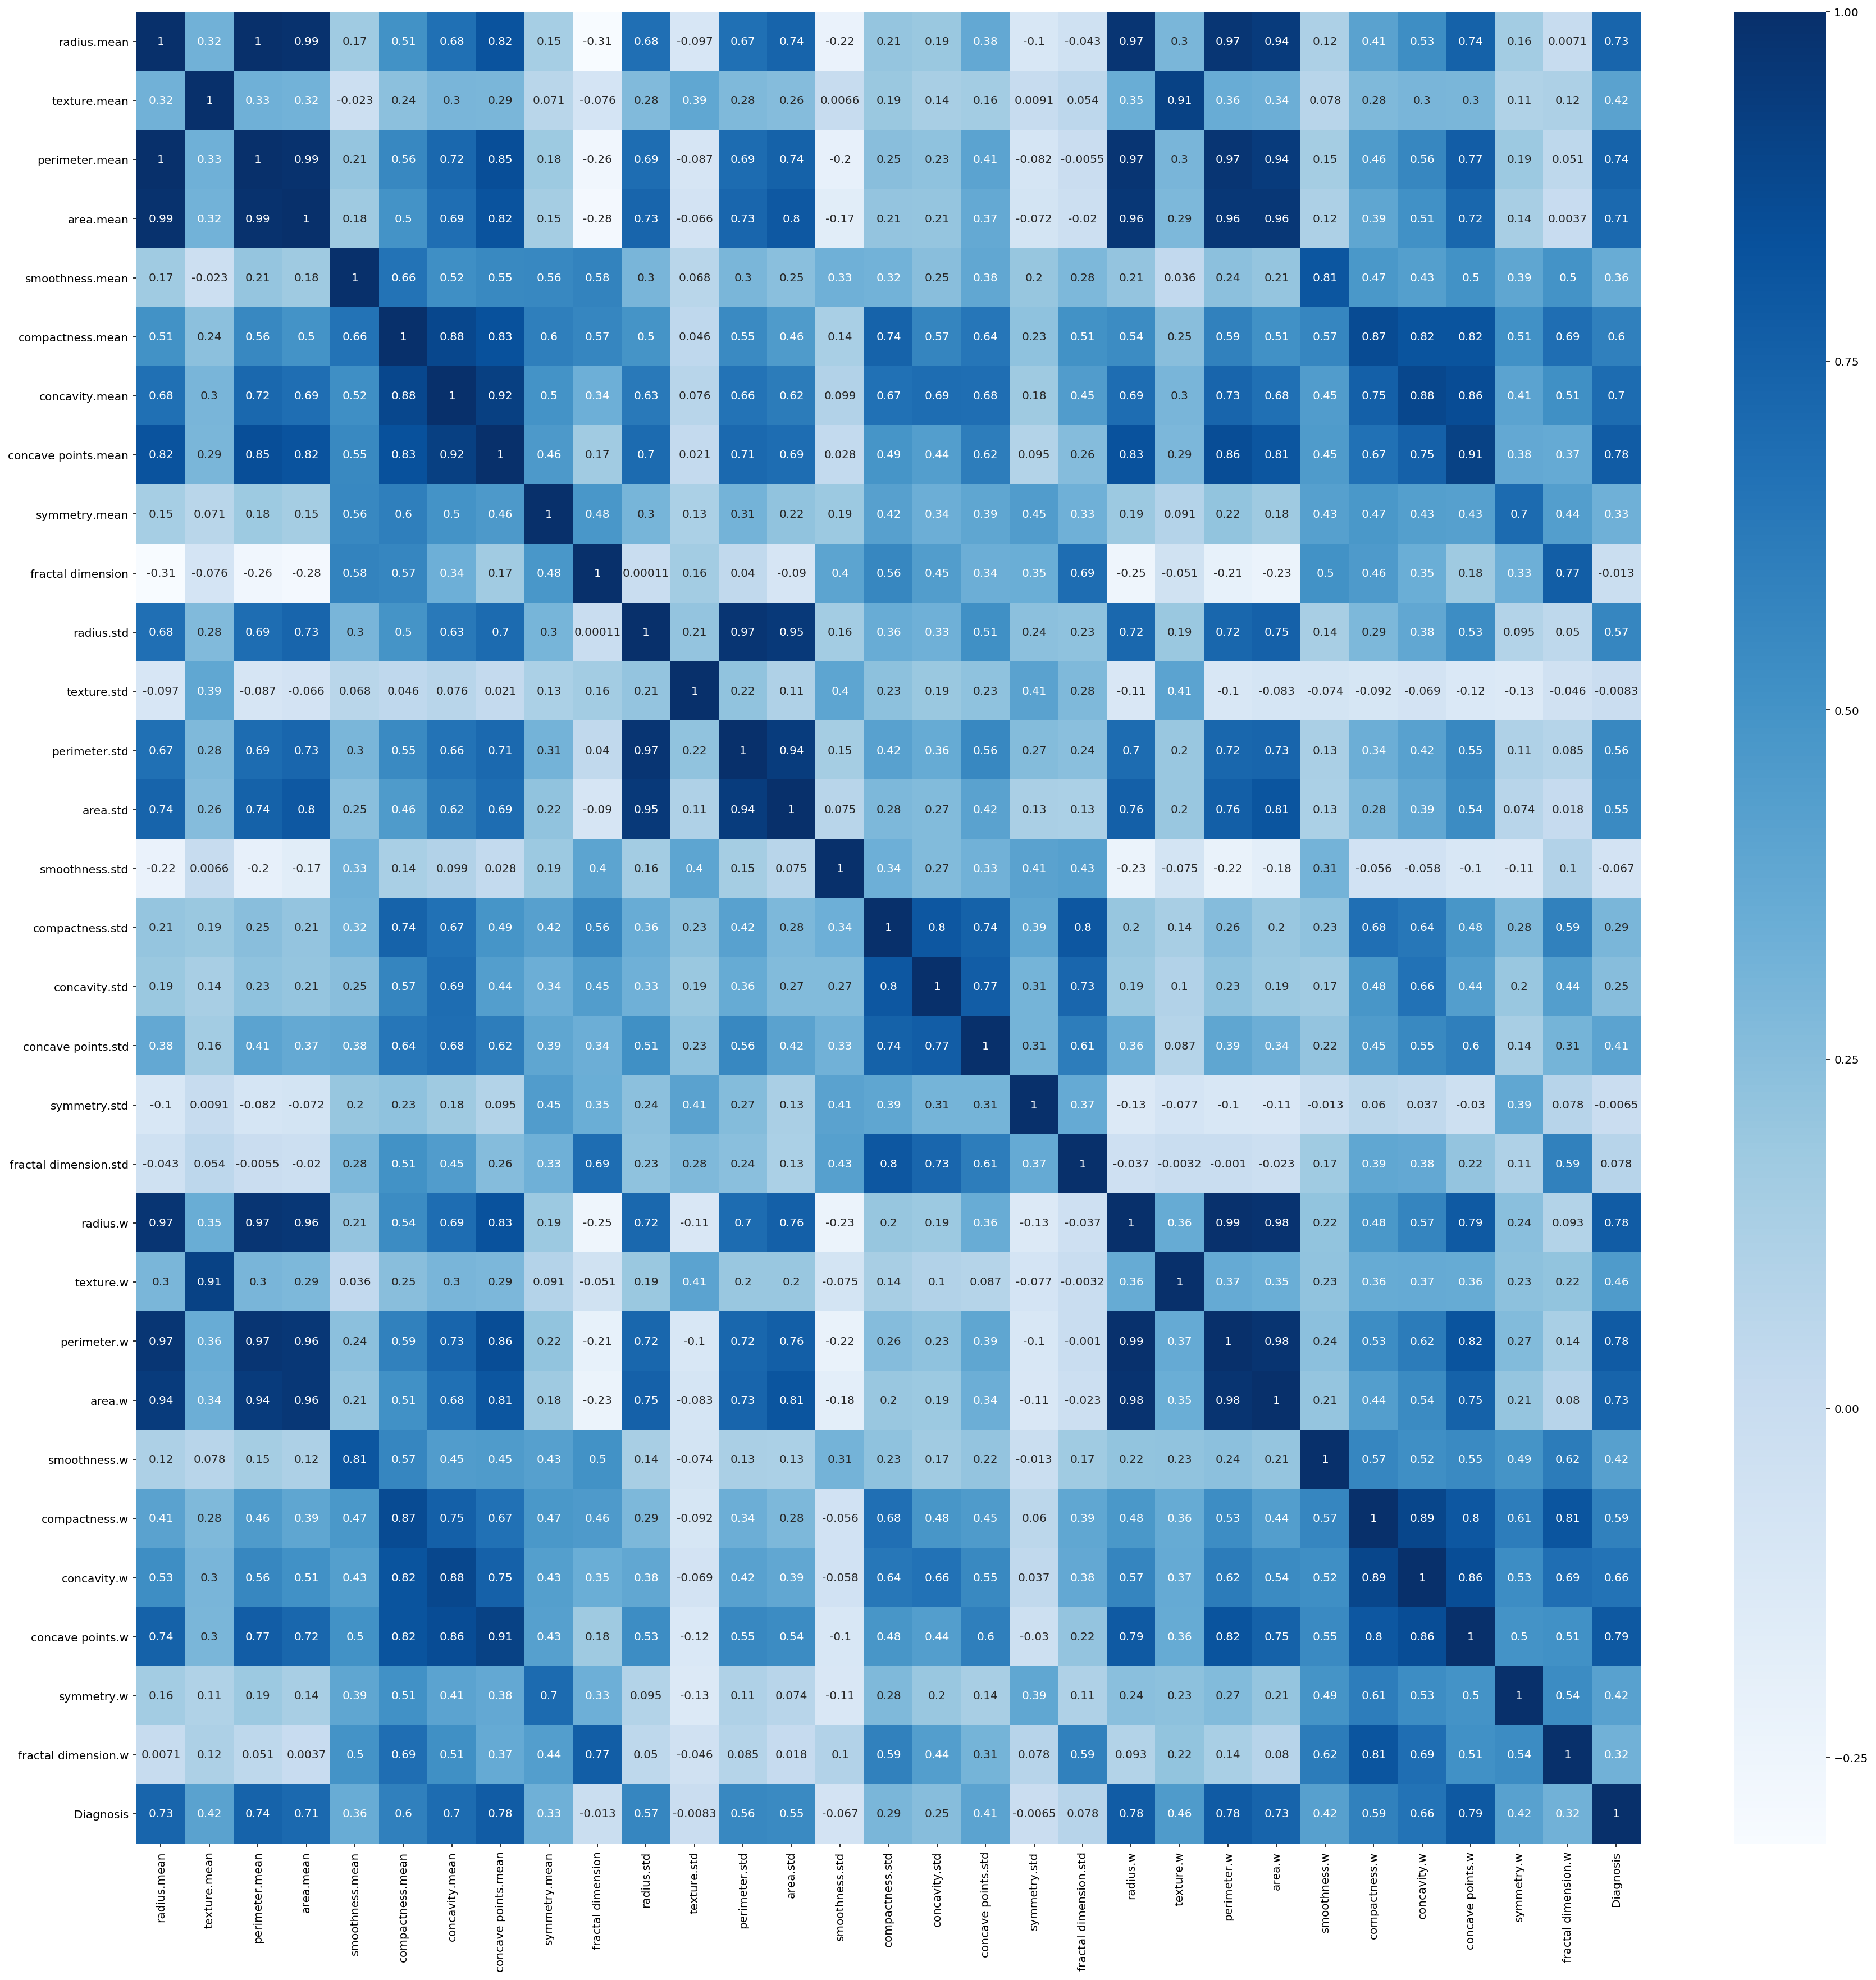

In [10]:
df_corr = dataset.iloc[:, 0:31].corr()
plt.figure(figsize=(30,30))
sn.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

In [11]:
# Some features show very high corelation to target values
# some values have strong corelation one to the other

In [12]:
dataset.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [13]:
# select the features to be vizualized
features=list(dataset.columns[20:30])

In [14]:
# split dataframe into two based on diagnosis
dfM=dataset[dataset['Diagnosis'] ==1]
dfB=dataset[dataset['Diagnosis'] ==0]

In [15]:
features

['radius.w',
 'texture.w',
 'perimeter.w',
 'area.w',
 'smoothness.w',
 'compactness.w',
 'concavity.w',
 'concave points.w',
 'symmetry.w',
 'fractal dimension.w']

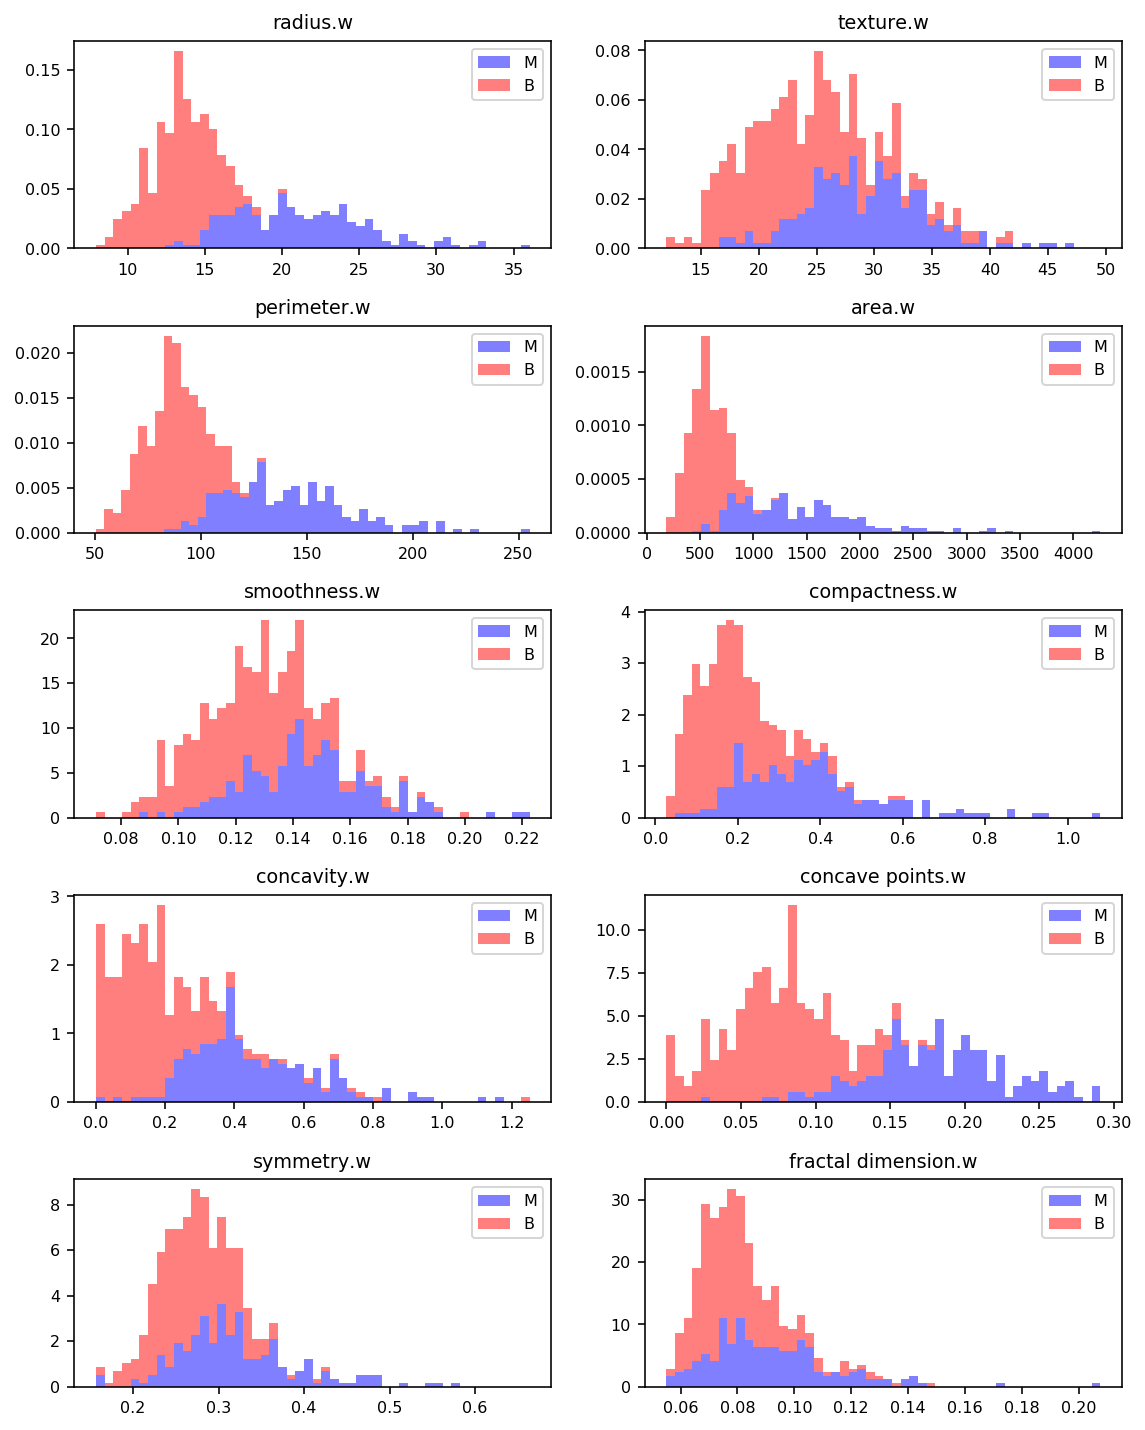

In [16]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(dataset[features[idx]]) - min(dataset[features[idx]]))/50
    bins=np.arange(min(dataset[features[idx]]), max(dataset[features[idx]]) + binwidth, binwidth)
    ax.hist([dfM[features[idx]],dfB[features[idx]]], bins,alpha=0.5,stacked=True, normed = True, label=['M','B'], color = ['b', 'r'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.tight_layout()
plt.show()

In [17]:
#mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer.
#Larger values of these parameters tends to show a correlation with malignant tumors.
# mean values of other featurs overlap

In [18]:
# std values of all  features are not distiguished between M amd B- overlapping.

In [19]:
#worse values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer.
#Larger values of these parameters tends to show a correlation with malignant tumors.
# worse values of other featurs overlap

In [20]:
dataset.skew()

radius.mean              0.942380
texture.mean             0.650450
perimeter.mean           0.990650
area.mean                1.645732
smoothness.mean          0.456324
compactness.mean         1.190123
concavity.mean           1.401180
concave points.mean      1.171180
symmetry.mean            0.725609
fractal dimension        1.304489
radius.std               3.088612
texture.std              1.646444
perimeter.std            3.443615
area.std                 5.447186
smoothness.std           2.314450
compactness.std          1.902221
concavity.std            5.110463
concave points.std       1.444678
symmetry.std             2.195133
fractal dimension.std    3.923969
radius.w                 1.103115
texture.w                0.498321
perimeter.w              1.128164
area.w                   1.859373
smoothness.w             0.415426
compactness.w            1.473555
concavity.w              1.150237
concave points.w         0.492616
symmetry.w               1.433928
fractal dimens

In [21]:
#Values closer to zero show less skew. texture.mean, smothness.mean, symmetry.mean, texture.worse, smothness.worst, symmetry.worse may be ignored.